In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
def dataParser(data):
    return pd.datetime.strptime('190'+data, '%Y-%m')

In [3]:
timeSeries= pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=dataParser)
print(timeSeries.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\dsi224\AppData\Local\Temp/ipykernel_4120/464852310.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+data, '%Y-%m')


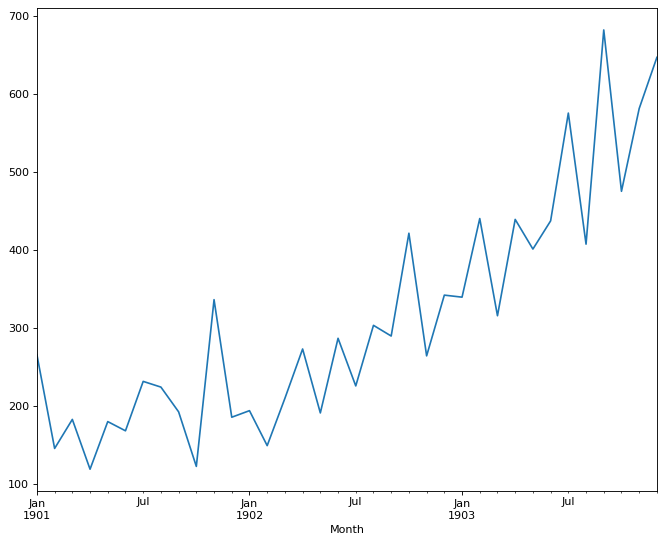

In [4]:
plt.figure(figsize=(10, 8), dpi=80)
timeSeries.plot()
plt.show()

C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


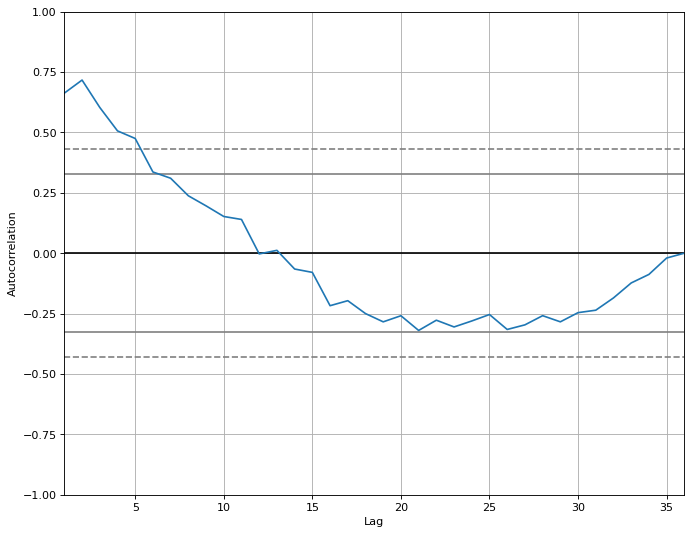

In [5]:
plt.figure(figsize=(10, 8), dpi=80)
autocorrelation_plot(timeSeries)
plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
timeSeries.index = timeSeries.index.to_period('M')

In [8]:
model = ARIMA(timeSeries, order=(5,1,0)) #(p,d,q)
model_fit = model.fit()

In [9]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 21 Mar 2022   AIC                            408.969
Time:                        17:35:08   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

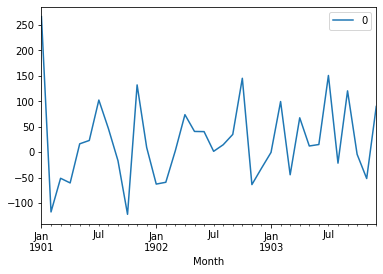

In [10]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

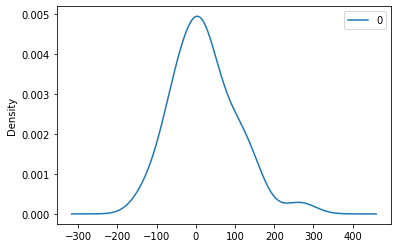

In [11]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [12]:
# summary stats of residuals
print(residuals.describe())

                0
count   36.000000
mean    21.936145
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
TS = timeSeries.values
size = int(len(TS) * 0.66)
train, test = TS[0:size], TS[size:len(TS)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'prediction={yhat:4f}, expected={obs}')

prediction=343.272180, expected=342.3
prediction=293.329674, expected=339.7
prediction=368.668956, expected=440.4
prediction=335.044741, expected=315.9
prediction=363.220222, expected=439.3
prediction=357.645324, expected=401.3
prediction=443.047835, expected=437.4
prediction=378.365674, expected=575.5
prediction=459.415020, expected=407.6
prediction=526.890876, expected=682.0
prediction=457.231274, expected=475.3
prediction=672.914943, expected=581.3
prediction=531.541449, expected=646.9


In [15]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


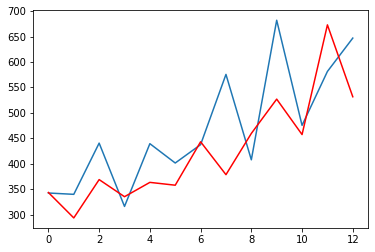

In [16]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()